# IDEFICS_ROCOv2

This notebook fine-tunes [Idefics3-8B-Llama3](https://huggingface.co/HuggingFaceM4/Idefics3-8B-Llama3) model. The source model is fine-tuned on the [Radiology Objects in Context (ROCO)](https://huggingface.co/datasets/eltorio/ROCOv2-radiology) dataset, a large-scale medical and multimodal imaging collection.  

The fine-tuning process stores the model checkpoints on a regular basis. Re run the notebook from the last checkpoint to continue the fine-tuning process.

## Try to mount Google Drive

In [1]:
try:
  import google.colab
  from google.colab import drive
  drive.mount('/content/drive')
  
except ModuleNotFoundError:
  raise Exception("You are not running this code in Google Colab. Please use Google Colab if you would like to save the model to Google Drive")

Exception: You are not running this code in Google Colab. Please use Google Colab if you would like to save the model to Google Drive

## Fine-tuning parameters

In [2]:
dataset_id = "eltorio/ROCOv2-radiology"
prompt= "You are an expert radiologist certified with over 15 years of experience in diagnostic imaging, describe this image"
source_model_id = "HuggingFaceM4/Idefics3-8B-Llama3"
destination_model_id = "eltorio/IDEFICS3_ROCOv2"
# if Google Drive is mounted, the model will be saved in a folder called IDEFICS3_ROCO in the root of your Google Drive
# else the model will be saved in the current working directory in a folder called IDEFICS3_ROCO
if 'drive' in globals():
    output_dir = "/content/drive/MyDrive/IDEFICS3_ROCOv2"
else:
    output_dir = "IDEFICS3_ROCOv2"

## Login on Hugging Face

In [ ]:
!git config --global credential.helper store
%pip install huggingface_hub

In [3]:
from huggingface_hub import login
import os

HF_TOKEN = "hf_C…………"

if os.environ.get('HF_TOKEN') is not None:
  HF_TOKEN = os.environ.get('HF_TOKEN')
  print(f"Hugging Face token found in environment variable")
try:
  import google.colab
  from google.colab import userdata
  if (userdata.get('HF_TOKEN') is not None) and (HF_TOKEN == ""):
    HF_TOKEN = userdata.get('HF_TOKEN')
  else:
    raise ValueError("Please set your Hugging Face token in the user data panel, or pass it as an environment variable")
except ModuleNotFoundError:
  if HF_TOKEN is None:
    raise ValueError("Please set your Hugging Face token in the user data panel, or pass it as an environment variable")

login(
  token=HF_TOKEN,
  add_to_git_credential=True
)

Hugging Face token found in environment variable


Note: Environment variable`HF_TOKEN` is set and is the current active token independently from the token you've just configured.


##### Optionally clone the model repository

In [3]:
# clone Hugging Face model repository
!git clone https://huggingface.co/$destination_model_id $output_dir

Cloning into 'IDEFICS3_ROCOv2'...
remote: Enumerating objects: 3, done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 3 (from 1)
Unpacking objects: 100% (3/3), 1.05 KiB | 1.05 MiB/s, done.


### Step 1: Install libraries and dependencies.

In [ ]:
%pip install -q git+https://github.com/huggingface/transformers.git
%pip install -q accelerate datasets peft
%pip install -q bitsandbytes

### Step 2: Retrieve the dataset from Hugging Face.

In [4]:
from datasets import load_dataset

full_dataset = load_dataset(dataset_id,keep_in_memory=False)
train_dataset = full_dataset["train"]
eval_dataset = full_dataset["validation"]

README.md:   0%|          | 0.00/4.50k [00:00<?, ?B/s]

Resolving data files:   0%|          | 0/27 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/27 [00:00<?, ?it/s]

train-00000-of-00027.parquet:   0%|          | 0.00/497M [00:00<?, ?B/s]

train-00001-of-00027.parquet:   0%|          | 0.00/504M [00:00<?, ?B/s]

train-00002-of-00027.parquet:   0%|          | 0.00/490M [00:00<?, ?B/s]

train-00003-of-00027.parquet:   0%|          | 0.00/485M [00:00<?, ?B/s]

train-00004-of-00027.parquet:   0%|          | 0.00/510M [00:00<?, ?B/s]

train-00005-of-00027.parquet:   0%|          | 0.00/498M [00:00<?, ?B/s]

train-00006-of-00027.parquet:   0%|          | 0.00/532M [00:00<?, ?B/s]

train-00007-of-00027.parquet:   0%|          | 0.00/482M [00:00<?, ?B/s]

train-00008-of-00027.parquet:   0%|          | 0.00/497M [00:00<?, ?B/s]

train-00009-of-00027.parquet:   0%|          | 0.00/489M [00:00<?, ?B/s]

train-00010-of-00027.parquet:   0%|          | 0.00/484M [00:00<?, ?B/s]

train-00011-of-00027.parquet:   0%|          | 0.00/508M [00:00<?, ?B/s]

train-00012-of-00027.parquet:   0%|          | 0.00/490M [00:00<?, ?B/s]

train-00013-of-00027.parquet:   0%|          | 0.00/499M [00:00<?, ?B/s]

train-00014-of-00027.parquet:   0%|          | 0.00/499M [00:00<?, ?B/s]

train-00015-of-00027.parquet:   0%|          | 0.00/498M [00:00<?, ?B/s]

train-00016-of-00027.parquet:   0%|          | 0.00/496M [00:00<?, ?B/s]

train-00017-of-00027.parquet:   0%|          | 0.00/498M [00:00<?, ?B/s]

train-00018-of-00027.parquet:   0%|          | 0.00/525M [00:00<?, ?B/s]

train-00019-of-00027.parquet:   0%|          | 0.00/486M [00:00<?, ?B/s]

train-00020-of-00027.parquet:   0%|          | 0.00/483M [00:00<?, ?B/s]

train-00021-of-00027.parquet:   0%|          | 0.00/495M [00:00<?, ?B/s]

train-00022-of-00027.parquet:   0%|          | 0.00/493M [00:00<?, ?B/s]

train-00023-of-00027.parquet:   0%|          | 0.00/494M [00:00<?, ?B/s]

train-00024-of-00027.parquet:   0%|          | 0.00/500M [00:00<?, ?B/s]

train-00025-of-00027.parquet:   0%|          | 0.00/511M [00:00<?, ?B/s]

train-00026-of-00027.parquet:   0%|          | 0.00/517M [00:00<?, ?B/s]

validation-00000-of-00006.parquet:   0%|          | 0.00/444M [00:00<?, ?B/s]

validation-00001-of-00006.parquet:   0%|          | 0.00/424M [00:00<?, ?B/s]

validation-00002-of-00006.parquet:   0%|          | 0.00/428M [00:00<?, ?B/s]

validation-00003-of-00006.parquet:   0%|          | 0.00/426M [00:00<?, ?B/s]

validation-00004-of-00006.parquet:   0%|          | 0.00/431M [00:00<?, ?B/s]

validation-00005-of-00006.parquet:   0%|          | 0.00/422M [00:00<?, ?B/s]

test-00000-of-00006.parquet:   0%|          | 0.00/436M [00:00<?, ?B/s]

test-00001-of-00006.parquet:   0%|          | 0.00/426M [00:00<?, ?B/s]

test-00002-of-00006.parquet:   0%|          | 0.00/443M [00:00<?, ?B/s]

test-00003-of-00006.parquet:   0%|          | 0.00/432M [00:00<?, ?B/s]

test-00004-of-00006.parquet:   0%|          | 0.00/425M [00:00<?, ?B/s]

test-00005-of-00006.parquet:   0%|          | 0.00/423M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/59962 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/9904 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/9927 [00:00<?, ? examples/s]

Loading dataset shards:   0%|          | 0/27 [00:00<?, ?it/s]

### Step 3: Test the data for detecting wrong Pillow version.

In [5]:
train_dataset[len(train_dataset)-4]

{'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1684x2294>,
 'image_id': 'ROCOv2_2023_train_060164',
 'caption': 'Right shoulder of a 50-year-old patient showing an anterior dislocated shoulder.',
 'cui': ['C0037005']}

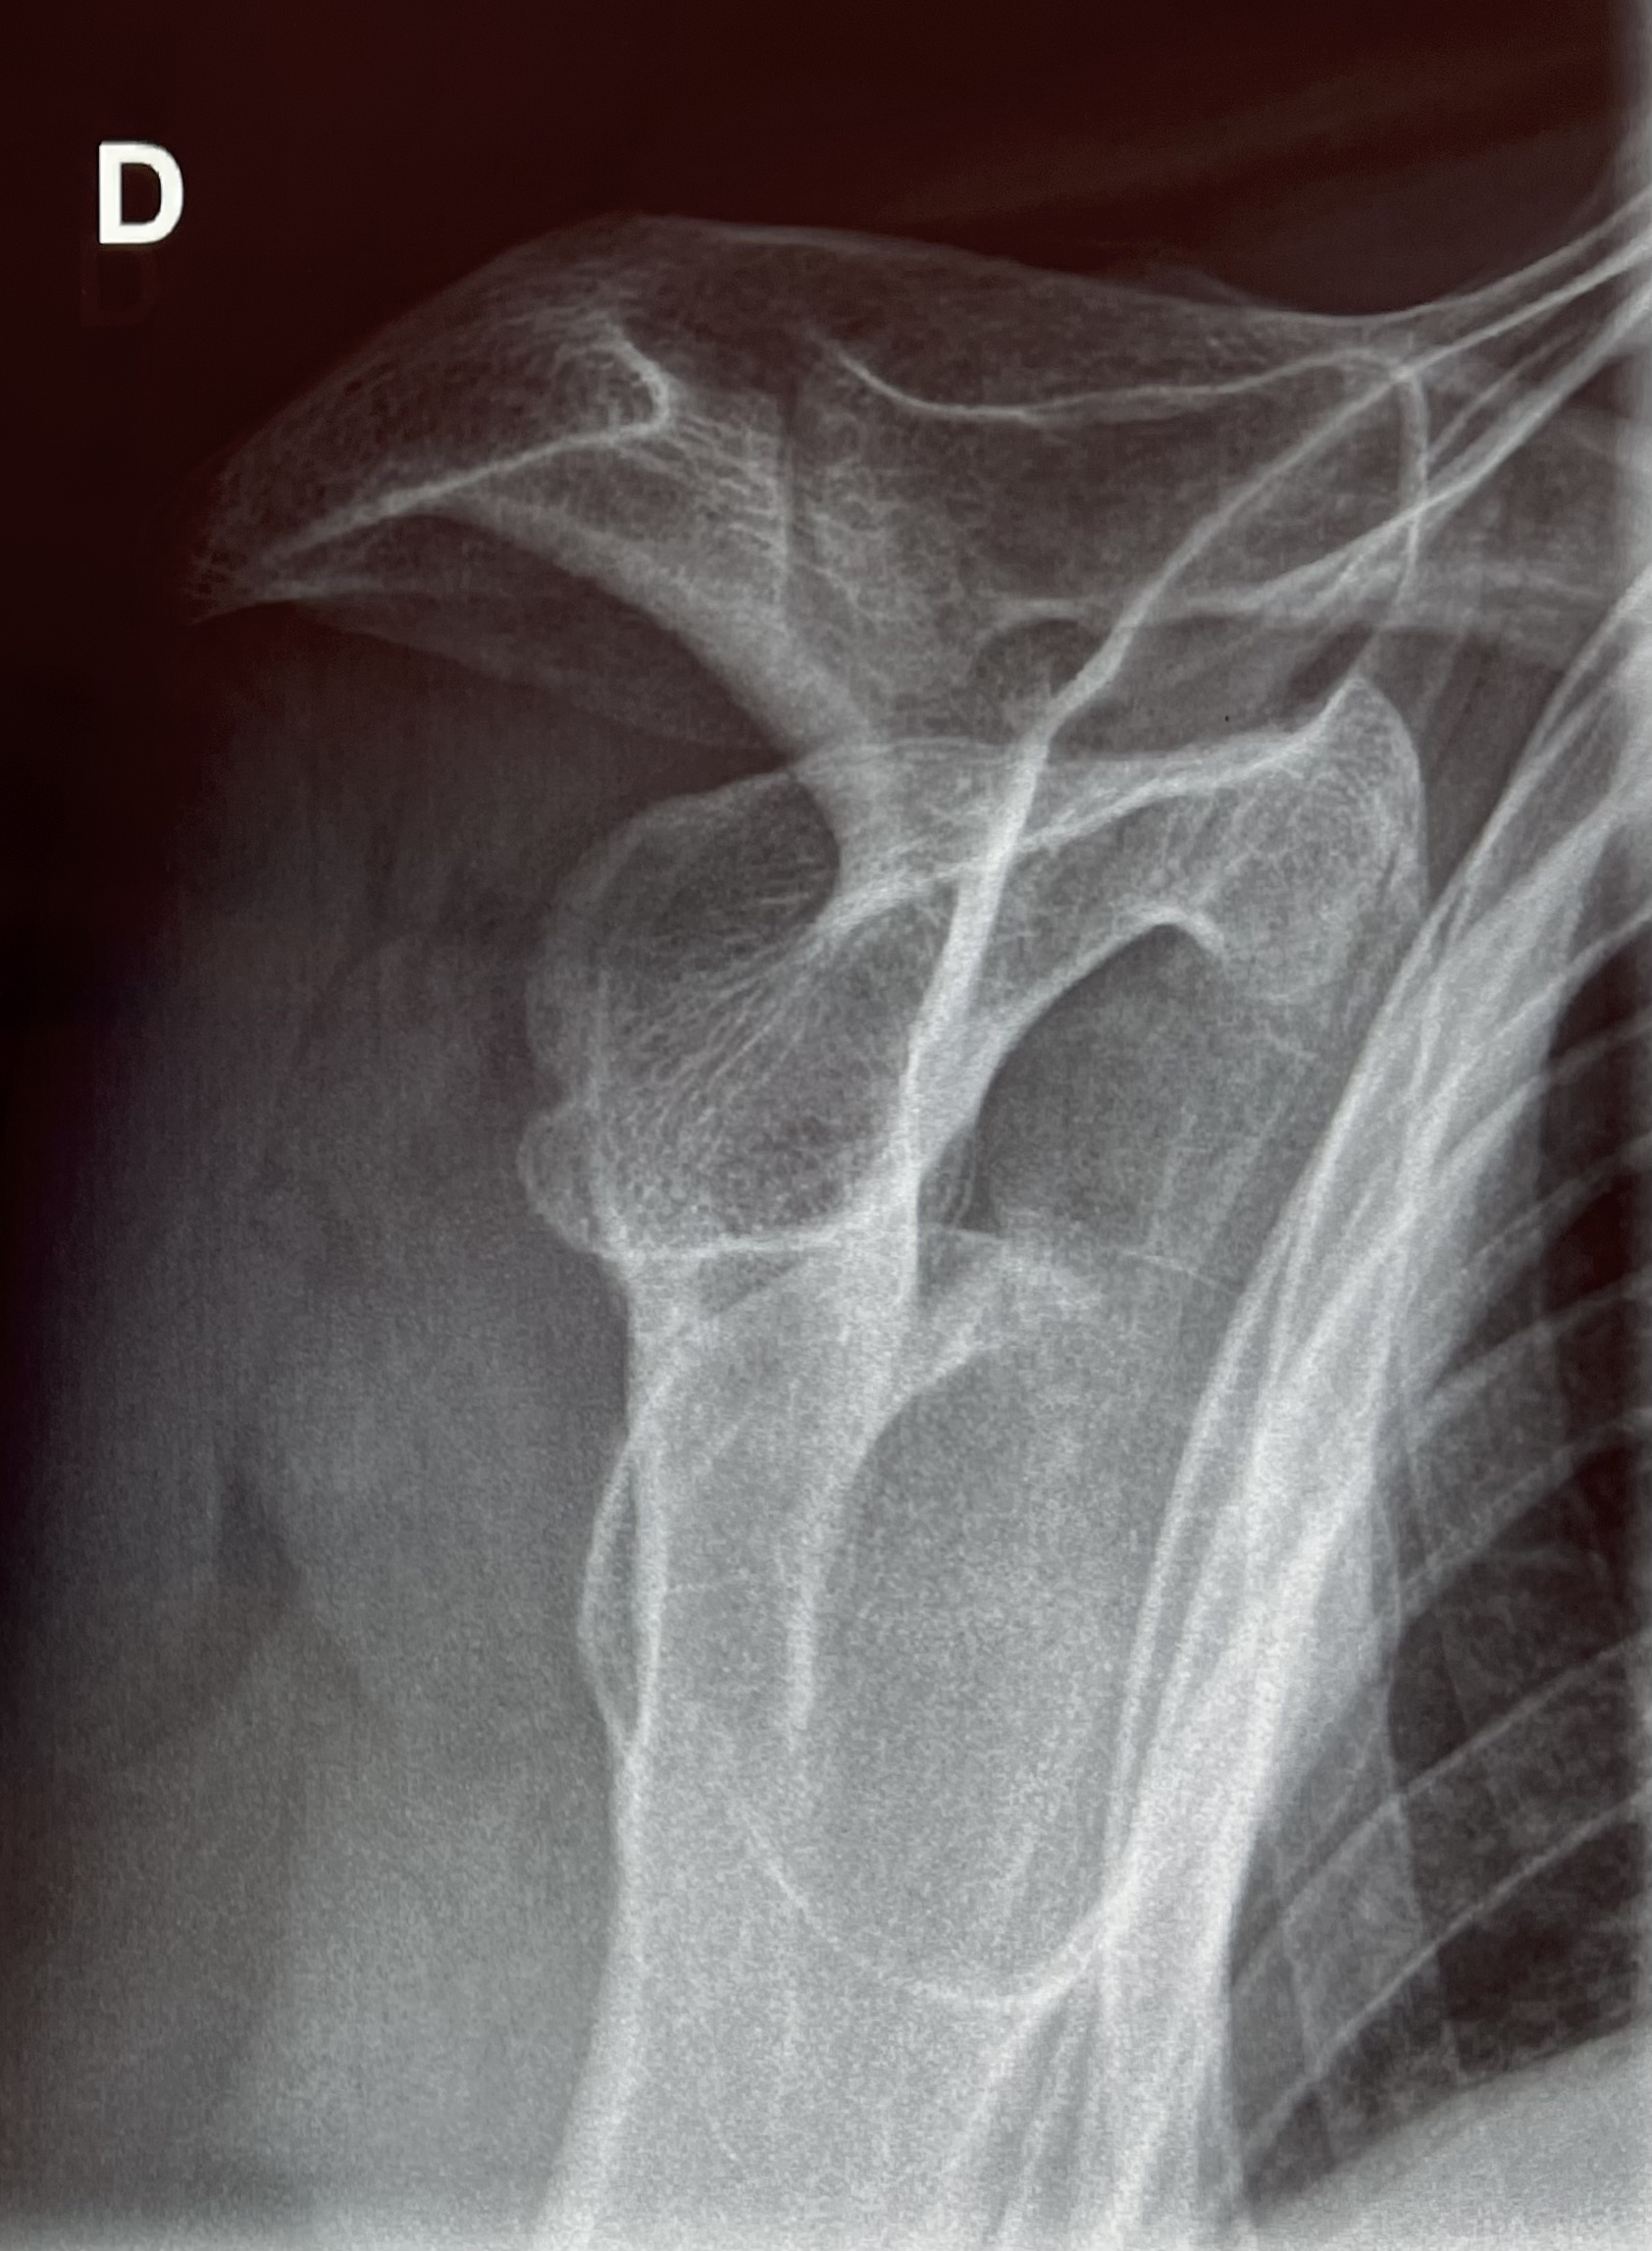

In [6]:
train_dataset[len(train_dataset)-4]['image']

### Step 4: Configure LoRA adapters

In [7]:
import torch
from peft import LoraConfig
from transformers import AutoProcessor, BitsAndBytesConfig, Idefics3ForConditionalGeneration

DEVICE = "cuda:0"
USE_LORA = False
USE_QLORA = True

processor = AutoProcessor.from_pretrained(
    source_model_id,
    do_image_splitting=False
)

if USE_QLORA or USE_LORA:
    lora_config = LoraConfig(
        r=8,
        lora_alpha=8,
        lora_dropout=0.1,
        target_modules='.*(text_model|modality_projection|perceiver_resampler).*(down_proj|gate_proj|up_proj|k_proj|q_proj|v_proj|o_proj).*$',
        task_type="CAUSAL_LM",
        use_dora=False if USE_QLORA else True,
        init_lora_weights="gaussian"
    )
    if USE_QLORA:
        bnb_config = BitsAndBytesConfig(
            load_in_4bit=True,
            bnb_4bit_quant_type="nf4",
            bnb_4bit_compute_dtype=torch.float16
        )
    model = Idefics3ForConditionalGeneration.from_pretrained(
        source_model_id,
        torch_dtype=torch.float16,
        quantization_config=bnb_config if USE_QLORA else None,
    )
    model.add_adapter(lora_config)
    model.enable_adapters()
else:
    model = Idefics3ForConditionalGeneration.from_pretrained(
        source_model_id,
        torch_dtype=torch.float16,
        _attn_implementation="flash_attention_2", # This works for A100 or H100
    ).to(DEVICE)

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

preprocessor_config.json:   0%|          | 0.00/435 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/51.7k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/951 [00:00<?, ?B/s]

chat_template.json:   0%|          | 0.00/434 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/7.18k [00:00<?, ?B/s]

`low_cpu_mem_usage` was None, now default to True since model is quantized.


model.safetensors.index.json:   0%|          | 0.00/70.6k [00:00<?, ?B/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/2.04G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/198 [00:00<?, ?B/s]

### Step 5: Create Data Collator for IDEFICS3 format.

In [8]:
class MyDataCollator:
    def __init__(self, processor):
        self.processor = processor
        self.image_token_id = processor.tokenizer.additional_special_tokens_ids[
            processor.tokenizer.additional_special_tokens.index("<image>")
        ]

    def __call__(self, samples):
        texts = []
        images = []
        for sample in samples:
            image = sample["image"]
            answer = sample["caption"]
            messages = [
                {
                    "role": "system",
                    "content": [
                        {"type": "text", "text": prompt}
                    ]

                },
                {
                    "role": "user",
                    "content": [
                        {"type": "image"},
                    ]
                },
                {
                    "role": "assistant",
                    "content": [
                        {"type": "text", "text": answer}
                    ]
                }
            ]
            text = processor.apply_chat_template(messages, add_generation_prompt=False)
            texts.append(text.strip())
            images.append([image.convert('RGB')])

        batch = processor(text=texts, images=images, return_tensors="pt", padding=True)

        labels = batch["input_ids"].clone()
        labels[labels == processor.tokenizer.pad_token_id] = self.image_token_id
        batch["labels"] = labels

        return batch

data_collator = MyDataCollator(processor)

### Step 6: Setup training parameters

In [9]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    output_dir = output_dir,
    overwrite_output_dir = False,
    auto_find_batch_size = True,
    learning_rate = 2e-4,
    fp16 = True,
    per_device_train_batch_size = 2,
    per_device_eval_batch_size = 2,
    gradient_accumulation_steps = 8,
    dataloader_pin_memory = False,
    save_total_limit = 3,
    eval_strategy = "steps",
    save_strategy = "steps",
    eval_steps = 100,
    save_steps = 10, # checkpoint each 10 steps
    resume_from_checkpoint = True,
    logging_steps = 5,
    remove_unused_columns = False,
    push_to_hub = True,
    label_names = ["labels"],
    load_best_model_at_end = False,
    report_to = "none",
    optim = "paged_adamw_8bit",
)

In [10]:
trainer = Trainer(
    model = model,
    args = training_args,
    data_collator = data_collator,
    train_dataset = train_dataset,
    eval_dataset = eval_dataset,
)

### Step 7: Start (or restart) Training

In [ ]:
trainer.train()

/workspace/.miniconda3/lib/python3.12/site-packages/transformers/integrations/peft.py:434: FutureWarning: The `active_adapter` method is deprecated and will be removed in a future version.
  warnings.warn(
/workspace/.miniconda3/lib/python3.12/site-packages/transformers/integrations/peft.py:434: FutureWarning: The `active_adapter` method is deprecated and will be removed in a future version.
  warnings.warn(
/workspace/.miniconda3/lib/python3.12/site-packages/transformers/integrations/peft.py:434: FutureWarning: The `active_adapter` method is deprecated and will be removed in a future version.
  warnings.warn(
/workspace/.miniconda3/lib/python3.12/site-packages/transformers/integrations/peft.py:434: FutureWarning: The `active_adapter` method is deprecated and will be removed in a future version.
  warnings.warn(
/workspace/.miniconda3/lib/python3.12/site-packages/transformers/integrations/peft.py:434: FutureWarning: The `active_adapter` method is deprecated and will be removed in a fut

In [11]:
model = Idefics3ForConditionalGeneration.from_pretrained(source_model_id , torch_dtype=torch.bfloat16).to(DEVICE)
model.load_adapter(destination_model_id, device_map="auto")

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

OutOfMemoryError: CUDA out of memory. Tried to allocate 20.00 MiB. GPU 0 has a total capacity of 6.00 GiB of which 0 bytes is free. Of the allocated memory 20.39 GiB is allocated by PyTorch, and 155.53 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)